In [1]:
import numpy as np
from my_own_main import phase_correlation
import matplotlib.pyplot as plt
import skimage
import skimage.data
import skimage.color

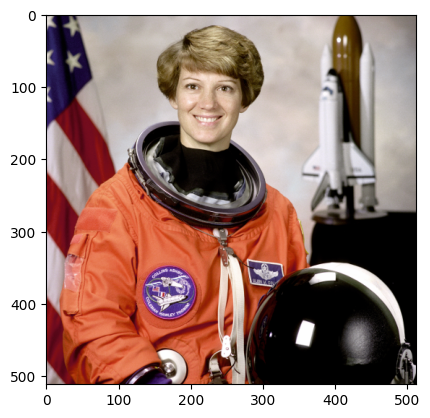

In [2]:
# test_data = skimage.data.camera()
test_data = skimage.data.astronaut()
# test_data = skimage.color.rgb2gray(test_data)

plt.imshow(test_data, cmap='gray')
plt.show()



In [3]:

def stitch_two_images(image_a, image_b, offset):
    """Combine two fragments with an offset."""
    # Offset is number of pixels to shift f2 to align with f1
    # Offset is the absolute offset of f2 relative to composite
    # Calculate the expected combined image size using the offset
    
    # Convert to floats to avoid overflow
    image_a = image_a.astype(np.float32)
    image_b = image_b.astype(np.float32)
    
    image_b_shape = image_b.shape

    start_y = offset[0]
    start_x = offset[1]
    end_y = start_y + image_b_shape[0]
    end_x = start_x + image_b_shape[1]
    top_pad = int(-min(0, start_y))
    left_pad = int(-min(0, start_x))
    bottom_pad = int(max(0, end_y - image_a.shape[0]))
    right_pad = int(max(0, end_x - image_a.shape[1]))

    if image_a.ndim == 2:
        pad_values = ((top_pad, bottom_pad), (left_pad, right_pad))
    else:
        pad_values = ((top_pad, bottom_pad), (left_pad, right_pad), (0, 0))
    new_composite = np.pad(
        image_a,
        pad_values,
        mode="constant",
        constant_values=0,
    )
    counts = np.zeros(new_composite.shape)
    counts[
        top_pad : top_pad + image_a.shape[0], left_pad : left_pad + image_a.shape[1], :
    ] = 1
    # Place new fragment in the new composite
    start_r = int(top_pad + start_y)
    start_c = int(left_pad + start_x)
    end_r = int(start_r + image_b_shape[0])
    end_c = int(start_c + image_b_shape[1])
    new_composite[start_r:end_r, start_c:end_c, :] += image_b
    counts[start_r:end_r, start_c:end_c, :] += 1
    counts[counts == 0] = 1
    new_composite = new_composite / counts
    return new_composite #.astype(image_a.dtype)

211
198


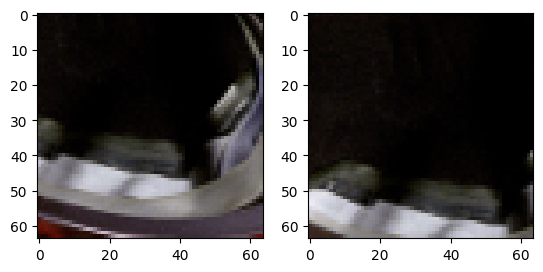

[-13 -13] 0.17483282332035885


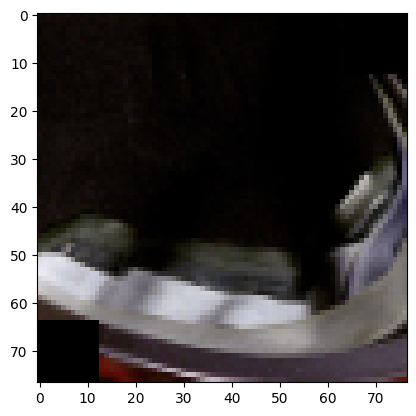

In [23]:
image_shape = test_data.shape
fraction_size = int(image_shape[0] * 0.75)
# image_a = test_data[:fraction_size, :]
# image_b = test_data[-fraction_size:, :]

# image_a = test_data[:, :fraction_size]
# image_b = test_data[-fraction_size:, -fraction_size:]
patch_size = 64
distance = 0.8
random_offset = np.random.randint(0, test_data.shape[0] - (1. + distance) * patch_size)
print(random_offset)
image_a = test_data[random_offset:random_offset + patch_size, random_offset:random_offset + patch_size]

random_offset = random_offset + int(patch_size * np.random.uniform(-distance, distance))
print(random_offset)
image_b = test_data[random_offset:random_offset + patch_size, random_offset:random_offset + patch_size]

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image_a, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(image_b, cmap='gray')
plt.show()


offset, corr = phase_correlation(image_a, image_b, use_skimage=False, full_convolution=False)
print(offset, corr)
# Offset is the vector pointing from image_a to image_b
# Offset is where to place image_b to align with image_a
composite = stitch_two_images(image_a, image_b, offset)
composite = composite.astype(np.uint8)
plt.imshow(composite)
plt.show()

In [5]:
offset, corr = phase_correlation(test_data, test_data, use_skimage=False, full_convolution=True, weight_edges=True)
print(offset, corr)

[0 0] 0.9999990460488966


In [6]:
offset, corr = phase_correlation(image_a, image_a, use_skimage=False, full_convolution=False)
print(offset, corr)

[0 0] 0.9999997871628639
